## Create Dataset

In [ ]:
import pandas as pd
import PyPDF2

In [ ]:
report_paths = ['OCR version - State Capture Commission Report Part 1 Vol I.pdf', 
                #'OCR version - State Capture Commission Report Part II Vol I.pdf',
                'OCR version - State Capture Commission Report Part II Vol II.pdf',
                'OCR version - State Capture Commission Report Part III Vol I - Bosasa.pdf',
                'OCR version - State Capture Commission Report Part III Vol II - Bosasa.pdf',
                'OCR version - State Capture Commission Report Part III Vol III - Bosasa.pdf',
                'OCR version - State Capture Commission Report Part III Vol IV - Bosasa.pdf',
                'OCR version - State Capture Commission Report Part IV Vol I - NT,EOH,COJ,Alexkor.pdf',
                'OCR version - State Capture Commission Report Part IV Vol II- FS.pdf',
                'OCR version - State Capture Commission Report Part IV Vol III - Eskom.pdf',
                'OCR version - State Capture Commission Report Part IV Vol IV - Eskom.pdf',
                'OCR version - State Capture Commission Report Part V Vol I - SSA.pdf',
                'OCR version - State Capture Commission Report Part V Vol II - SABC,Waterkloof,Prasa.pdf',
                'OCR version - State Capture Commission Report Part VI Vol I - Estina,Vrede.pdf',
                'OCR version - State Capture Commission Report Part VI Vol II - CR.pdf',
                'OCR version - State Capture Commission Report Part VI Vol III - Flow of Funds.pdf',
                'OCR version - State Capture Commission Report Part VI Vol IV - Recommendations.pdf']

zondo_reports = pd.DataFrame(columns=['report', 'text'])
i = 0

for path in report_paths:
   pdfFileObj = open(path, 'rb')
   print('opened', path)
   #pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
   pdfReader = PyPDF2.PdfReader(pdfFileObj)
   text=''
   for page in pdfReader.pages:
    text += page.extract_text()
   print('extracted text for', path)
   zondo_reports.loc[i] = [path, text]
   i+=1
   pdfFileObj.close()
   print('closed', path)


In [ ]:
zondo_reports.to_csv('zondo_reports.csv')

## Analysis

In [145]:
import nltk
import numpy
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import pandas as pd

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/20790627/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/20790627/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
# these are the companies listed on the Johannesburg Stock Exchange
listed_companies = pd.read_excel('Complete-List-of-Listed-Companies-on-South-Africa-Johannesburg-Stock-Exchange-Jan-2021.xlsx')
listed_companies = listed_companies.rename(columns={'Company Name': 'CompanyName'})
listed_companies.head()

,S.No.,CompanyName,Ticker,Sector
0,1,4Sight Holdings Limited,4SI,Financial Services
1,2,ABSA Bank Limited,ABSP,Banks
2,3,Barclays Africa Group Limited,ABG.ZA,Banks
3,4,Accelerate Property Fund Limited,APF,Real Estate Investment Trusts
4,5,Accentuate Limited,ACE,Chemicals


In [147]:
companies = list(listed_companies['CompanyName'].unique())

In [148]:
# load the Zondo Comission Into State Capture reports
zondo_reports = pd.read_csv('zondo_reports.csv')
zondo_reports = zondo_reports.drop(columns=['Unnamed: 0'])
zondo_reports.head()

,report,text
0,OCR version - State Capture Commission Report ...,dicial \nn of Ir• \nS a \nI I eport: Part 1 \n...
1,OCR version - State Capture Commission Report ...,Judicial Commission \nOf \n Inquiry into...
2,OCR version - State Capture Commission Report ...,\n \nJudicial Commission \nof \nInquiry into...
3,OCR version - State Capture Commission Report ...,Chairperson: Justice RtM Zondo \nActing Chief ...
4,OCR version - State Capture Commission Report ...,\n \nJudicial Commission \nof \nInquiry into...


In [149]:
# amalgamate the content of all report volumes into a list
content = zondo_reports['text'].to_list()

In [150]:
content[0][0:1000]

'dicial \nn of Ir• \nS a \nI I eport: Part 1 \n: South African Airways and its \nAssociated Companies \n\\ \\ \nChairperson: Justice RMM Zondo \nActing Chief Justice of the Republic of South Africa e report of the Judicial Commission of Inquiry into allegations of \nure, Corruption and Fraud in the Public Sector including organs of \nlso known to the public and the media as the Zondo Commission JudicialJudicial\nCommission of Commission of Inquiry into Inquiry into \nState Capture State Capture \nReport: Part 1Report: Part 1\nVol. 1:  South African Airways and its Vol. 1:  South African Airways and its \nAssociated CompaniesAssociated Companies\nChairperson: Justice RMM ZondoActing Chief Justice of the Republic of South Africa\nReport of the Judicial Commission of Report of the Judicial Commission of Inquiry into State Capture: Part 1:  Vol.  1 Inquiry into State Capture: Part 1:  Vol.  1 \nThis is the report of the Judicial Commission of Inquiry into allegations of State Capture, Corr

In [152]:
# join items in content list as a literal string, then tokenize
all_content = " ".join(content[:])
all_content_tokens = word_tokenize(all_content) 

In [153]:
# and filter out the stops
just_tokens = ['mr','ms','dr','p','``', '\'s','’','’’','\'\'','“','”','................................','l']

removables = set(stopwords.words('English') + list(string.punctuation) + list(string.digits) + just_tokens)

filtered_tokens = [token for token in all_content_tokens if token not in removables]

In [154]:
# other things to add: 
# maybe manually move Efficient Group and Five Group to the two_name_comps 
# create a final dataframe with the full company names
# if this isn't enough we can add frequencies

In [155]:
stops = ['Holdings', 'Limited', 'Ltd', 'Plc', 'plc', 'Group', 'Company', 'Fund', 'Corporation', 'Corp', 'Investments', 'Compagnie Financiere', 'Ld', 'International', 'NV']

def search_term(name: str):
    for stop in stops:
        name = name.replace(stop, '')
        name = name.strip()
    if len(name.split()) == 1:
        name = tuple(name.split(' '))
        return name
    elif len(name.split()) == 2:
        name = tuple(name.split(' '))
        return name
    elif len(name.split()) == 3:
        name = tuple(name.split(' '))
        return name
    else:
        first_three_words = ' '.join(name.split()[:3])
        first_three_words = tuple(first_three_words.split(' '))
        return first_three_words
    

In [156]:
# listed_companies = listed_companies.assign(search_term=lambda x: search_term(x.CompanyName))

listed_companies['SearchTerm'] = listed_companies.apply(lambda row : search_term(row['CompanyName']), axis = 1)

In [157]:
listed_companies

,S.No.,CompanyName,Ticker,Sector,SearchTerm
0,1,4Sight Holdings Limited,4SI,Financial Services,"(4Sight,)"
1,2,ABSA Bank Limited,ABSP,Banks,"(ABSA, Bank)"
2,3,Barclays Africa Group Limited,ABG.ZA,Banks,"(Barclays, Africa)"
3,4,Accelerate Property Fund Limited,APF,Real Estate Investment Trusts,"(Accelerate, Property)"
4,5,Accentuate Limited,ACE,Chemicals,"(Accentuate,)"
...,...,...,...,...,...
398,399,Woolworths Holdings Limited,WHL,General Retailers,"(Woolworths,)"
399,400,Workforce Holdings Limited,WKF,Support Services,"(Workforce,)"
400,401,York Timber Holdings Limited,YRK,Forestry & Paper,"(York, Timber)"
401,402,ZCI Limited,ZCI,Industrial Metals & Mining,"(ZCI,)"


In [158]:
from cmath import inf

listed_companies["FoundInReport"] = "False"

bigrams = list(nltk.bigrams(filtered_tokens)) 
trigrams = list(nltk.trigrams(filtered_tokens)) 
# final_list = []

for ind in listed_companies.index:
    searchterm = listed_companies['SearchTerm'][ind]
    if len(searchterm) == 1:
        if searchterm[0] in filtered_tokens:
             print('1 word company appeared in text:', searchterm)
             listed_companies.at[ind,'FoundInReport'] = True
    if len(searchterm) == 2:
        if searchterm in bigrams:
            print('2 word company appeared in text:', searchterm)
            listed_companies.at[ind,'FoundInReport'] = True
    if len(searchterm) == 3:
        if searchterm in trigrams:
            print('3 word company appeared in text:', searchterm)
            listed_companies.at[ind,'FoundInReport'] = True
    

2 word company appeared in text: ('ABSA', 'Bank')
2 word company appeared in text: ('Barclays', 'Africa')
2 word company appeared in text: ('African', 'Bank')
2 word company appeared in text: ('Anglo', 'American')
1 word company appeared in text: ('Bid',)
3 word company appeared in text: ('Blue', 'Label', 'Telecoms')
3 word company appeared in text: ('Caxton', 'CTP', 'Publishers')
1 word company appeared in text: ('Command',)
1 word company appeared in text: ('Efficient',)
1 word company appeared in text: ('EOH',)
1 word company appeared in text: ('Firstrand',)
1 word company appeared in text: ('Glencore',)
1 word company appeared in text: ('Five',)
2 word company appeared in text: ('Impala', 'Platinum')
1 word company appeared in text: ('Imperial',)
1 word company appeared in text: ('Hotel',)
1 word company appeared in text: ('Investec',)
1 word company appeared in text: ('Investec',)
1 word company appeared in text: ('ISA',)
1 word company appeared in text: ('JSE',)
1 word company ap

In [159]:
listed_companies.loc[listed_companies['FoundInReport'] == True]

,S.No.,CompanyName,Ticker,Sector,SearchTerm,FoundInReport
1,2,ABSA Bank Limited,ABSP,Banks,"(ABSA, Bank)",True
2,3,Barclays Africa Group Limited,ABG.ZA,Banks,"(Barclays, Africa)",True
15,16,African Bank Investments Limited,ABL,Financial Services,"(African, Bank)",True
34,35,Anglo American Plc,AGL,Mining,"(Anglo, American)",True
63,64,Bid Corp Limited,BID,Health Care Equipment & Services,"(Bid,)",True
66,67,Blue Label Telecoms Limited,BLU,Support Services,"(Blue, Label, Telecoms)",True
89,90,Caxton CTP Publishers & Printers Ltd,CAT,Media,"(Caxton, CTP, Publishers)",True
101,102,Command Holdings Limited,CMA,General Retailers,"(Command,)",True
126,127,Efficient Group Limited,EFG,Financial Services,"(Efficient,)",True
132,133,EOH Holdings Limited,EOH,Software & Computer Services,"(EOH,)",True


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

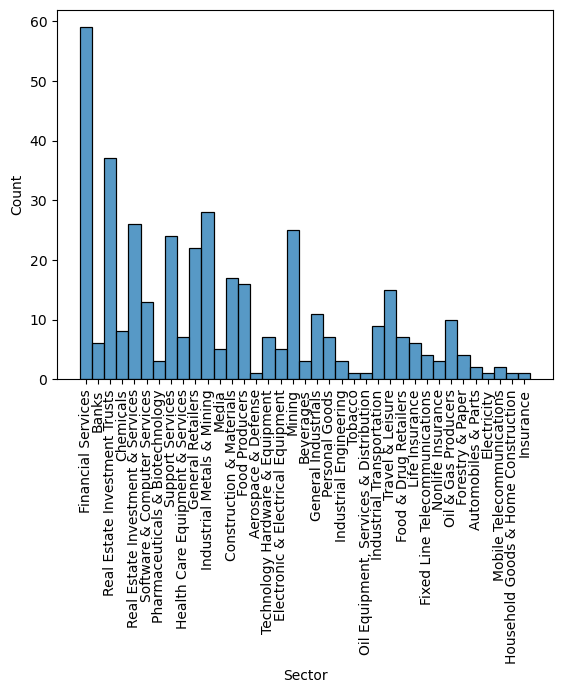

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.histplot(data=listed_companies, x="Sector")
plt.xticks(rotation=90)